# 神奇宝贝数据分析

<ul>
<li><a href="#intro">一. 简介</a></li>
<li><a href="#wrangling">二. 数据整理</a></li>
<li><a href="#eda">三. 探索性数据分析</a></li>
<li><a href="#conclusions">四. 统计结论</a></li>
</ul>

<a id='intro'></a>
## 一. 简介

> **Pokemon数据集包含了从第一代至第七代的Pokemon的名字、属性、能力等信息  
本项目将通过Pokemon数据集探索一下几个问题：**  
1. 具有双属性Pokemon的比例
2. 最常见的Pokemon类别
3. Type1和Type2最常见的属性
4. 各代种族值最高的Pokemon
5. Pokemon性别比例
6. 传奇Pokemon的比例
7. Pokemon平均身高和体重
8. 生命值、攻击力、防御力、特殊攻击力和特殊防御力分别最高的Pokemon

> **Pokemon数据库字段描述**  
本数据集中包含 801 条Pokemon信息  

字段|描述|数据类型
-----:|-----:|------:  
_id  |  编号  |  int64
english_name  |  英文名  |  object
chinese_name  |  中文名  |  object
category  |  类别  |  object
type1  |  属性1  |  object
type2  |  属性2  |  object
ability_1  |  特性1  |  object
ability_2 | 特性2 | object
male_ratio  |  雄性比例 |   float64
height_m  |  身高（米）  |  float64
wight_kg  |  体重（公斤） |   float64
total  |  种族值  |  int64
hp  |  生命值  |  int64
atk  |  攻击力  |  int64
defense  |  防御力  |  int64
spatk  |  特殊攻击力  |  int64
spdef  |  特殊防御力  |  int64
speed  |  速度  |  int64
catch_rate  |  普通精灵球抓到的概率  |  int64
generation  |  第几代  |  object
image_url  |  图片链接  |  object
hatch_time  |  孵化步数  |  int64
exp_100 |   100级所需经验值  |  object
against_bug  |  属性相克-虫  |  float64
against_dark  |  属性相克-恶  |  float64
against_dragon  |  属性相克-龙  |  float64
against_electric  |  属性相克-电  |  float64
against_fairy  |  属性相克-精灵  |  float64
against_fight  |  属性相克-格斗  |  float64
against_fire  |  属性相克-火  |  float64
against_flying  |  属性相克-飞行  |  float64
against_ghost  |  属性相克-幽灵  |  float64
against_grass  |  属性相克-草  |  float64
against_ground  |  属性相克-地面  |  float64
against_ice  |  属性相克-冰  |  float64
against_normal  |  属性相克-普通  |  float64
against_poison  |  属性相克-毒  |  float64
against_psychic  |  属性相克-精神  |  float64
against_rock  |  属性相克-岩石  |  float64
against_steel  |  属性相克-刚  |  float64
against_water  |  属性相克-水  |  float64

<a id='wrangling'></a>
## 二. 数据整理

In [1]:
#coding:utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 10000)

In [2]:
df = pd.read_csv('POKEMONS_STATS.csv', encoding='utf-8')

### 1. 观察数据

In [3]:
df.head()

,_id,ability_1,ability_2,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,atk,catch_rate,category,chinese_name,defense,english_name,exp_100,generation,hatch_time,height_m,hp,image_url,male_ratio,spatk,spdef,speed,total,type_1,type_2,weight_kg
0,1,茂盛,叶绿素隱藏特性,1,1,1,1⁄2,1⁄2,1⁄2,2,2,1,1⁄4,1,2,1,1,2,1,1,1⁄2,49,5.9%,种子宝可梦,妙蛙种子,49,Bulbasaur,"1,059,860",第一世代寶可夢,5140步,0.7,45,https://media.52poke.com/wiki/thumb/2/21/001Bu...,87.5%,65,65,45,318,草,毒,6.9
1,2,茂盛,叶绿素隱藏特性,1,1,1,1⁄2,1⁄2,1⁄2,2,2,1,1⁄4,1,2,1,1,2,1,1,1⁄2,62,5.9%,种子宝可梦,妙蛙草,63,Ivysaur,"1,059,860",第一世代寶可夢,5140步,1.0,60,https://media.52poke.com/wiki/thumb/7/73/002Iv...,87.5%,80,80,60,405,草,毒,3.0
2,3,茂盛,叶绿素隱藏特性,1,1,1,1⁄2,1⁄2,1⁄2,1,2,1,1⁄4,1,1,1,1,2,1,1,1⁄2,82,5.9%,种子宝可梦,妙蛙花,83,Venusaur,"1,059,860",第一世代寶可夢,5140步,2.0,80,https://media.52poke.com/wiki/thumb/a/ae/003Ve...,87.5%,100,100,80,525,草,毒,100.0
3,4,猛火,太阳之力隱藏特性,1⁄2,1,1,1,1⁄2,1,1⁄2,1,1,1⁄2,2,1⁄2,1,1,1,2,1⁄2,2,52,5.9%,蜥蜴宝可梦,小火龙,43,Charmander,"1,059,860",第一世代寶可夢,5140步,0.6,39,https://media.52poke.com/wiki/thumb/7/73/004Ch...,87.5%,60,50,65,309,火,NaN,8.5
4,5,猛火,太阳之力隱藏特性,1⁄2,1,1,1,1⁄2,1,1⁄2,1,1,1⁄2,2,1⁄2,1,1,1,2,1⁄2,2,64,5.9%,火焰宝可梦,火恐龙,58,Charmeleon,"1,059,860",第一世代寶可夢,5140步,1.1,58,https://media.52poke.com/wiki/4/4a/005Charmele...,87.5%,80,65,80,405,火,NaN,9.0


In [4]:
df.describe()

,_id,atk,defense,height_m,hp,spatk,spdef,speed,total,weight_kg
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000
mean,405.000000,76.149567,71.744129,1.144376,68.716934,69.457355,69.951792,65.800989,421.820766,42.555253
std,233.682477,29.601874,29.749574,0.972542,26.095127,29.408710,27.277795,27.797022,111.006305,117.980995
min,1.000000,5.000000,5.000000,0.000000,1.000000,10.000000,20.000000,5.000000,175.000000,0.000000
25%,203.000000,55.000000,50.000000,0.600000,50.000000,45.000000,50.000000,45.000000,320.000000,2.000000
50%,405.000000,75.000000,67.000000,1.000000,65.000000,65.000000,65.000000,65.000000,431.000000,5.000000
75%,607.000000,95.000000,89.000000,1.500000,80.000000,90.000000,85.000000,85.000000,500.000000,8.500000
max,809.000000,181.000000,230.000000,9.200000,255.000000,173.000000,230.000000,160.000000,720.000000,999.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 41 columns):
_id                 809 non-null int64
ability_1           809 non-null object
ability_2           691 non-null object
against_bug         809 non-null object
against_dark        809 non-null object
against_dragon      809 non-null object
against_electric    809 non-null object
against_fairy       803 non-null object
against_fight       809 non-null object
against_fire        809 non-null object
against_flying      809 non-null object
against_ghost       809 non-null object
against_grass       809 non-null object
against_ground      809 non-null object
against_ice         809 non-null object
against_normal      809 non-null object
against_poison      809 non-null object
against_psychic     809 non-null object
against_rock        809 non-null object
against_steel       809 non-null object
against_water       809 non-null object
atk                 809 non-null int64
catch_rate       

### 2. 更改数据类型

In [6]:
def convert_object_to_float(o):
    '''
    删除百分号，将 object 转换成 float
    '''
    if o == '无性别':
        return None
    return float(o.strip('%')) / 100

In [7]:
# catch_rate object -> float
df.catch_rate =  df.catch_rate.apply(convert_object_to_float)

In [8]:
# male_ratio object -> float
df.male_ratio = df.male_ratio.apply(convert_object_to_float)

In [9]:
def convert_hatch_time(o):
    '''
    删除 ''步'' ，将 object 转换成 int
    '''
    return int(o.strip('步'))

In [10]:
# hatch_time object -> int
df.hatch_time = df.hatch_time.apply(convert_hatch_time)

In [11]:
df_against = df[['against_bug',  'against_dark', 
                       'against_dragon', 'against_electric', 
                       'against_fairy', 'against_fight', 
                       'against_fire', 'against_flying',
                       'against_ghost', 'against_grass',
                       'against_ground', 'against_ice',
                       'against_normal', 'against_poison',
                       'against_psychic', 'against_rock',
                       'against_steel', 'against_water']]

In [12]:
def convert_against(o):
    '''
    将字符形式的值转换成 float
    '''
    if o == '1⁄2':
        return 0.5
    elif o == '11⁄2':
        return 0.5
    elif o == '21⁄2':
        return 0.5
    elif o == '1⁄4':
        return 0.25
    elif o == '11⁄4':
        return 0.25
    elif o == '1⁄8':
        return 0.125
    elif o == None:
        return None
    else:
        return float(o)

In [13]:
df_against = df_against.applymap(convert_against)

In [14]:
df[['against_bug',  'against_dark', 
'against_dragon', 'against_electric', 
'against_fairy', 'against_fight', 
'against_fire', 'against_flying',
'against_ghost', 'against_grass',
'against_ground', 'against_ice',
'against_normal', 'against_poison',
'against_psychic', 'against_rock',
'against_steel', 'against_water']] = df_against

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 41 columns):
_id                 809 non-null int64
ability_1           809 non-null object
ability_2           691 non-null object
against_bug         809 non-null float64
against_dark        809 non-null float64
against_dragon      809 non-null float64
against_electric    809 non-null float64
against_fairy       803 non-null float64
against_fight       809 non-null float64
against_fire        809 non-null float64
against_flying      809 non-null float64
against_ghost       809 non-null float64
against_grass       809 non-null float64
against_ground      809 non-null float64
against_ice         809 non-null float64
against_normal      809 non-null float64
against_poison      809 non-null float64
against_psychic     809 non-null float64
against_rock        809 non-null float64
against_steel       809 non-null float64
against_water       809 non-null float64
atk                 809 non-null int64

部分 Pokemon 只有一种特性，故 ability_2 具有缺失值  
部分 Pokemon 只有一种属性，故 type_2 具有缺失值  
部分 Pokemon 没有性别，故 male_ratio 具有缺失值

<a id='eda'></a>
## 三. 探索性数据分析

### 1. 具有双属性Pokemon的比例

In [16]:
df.type_2.count() / df.shape[0]

0.5006180469715699

有超过一半的Pokemon具有双属性

### 2. 最常见的 Pokemon 种类

In [17]:
most_fre_category = df.category.value_counts()[:10]

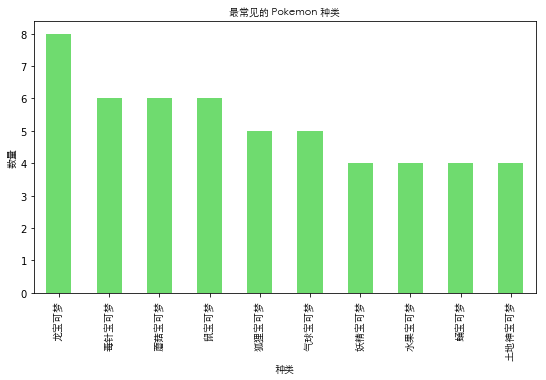

In [18]:
# 设置字体
font = fm.FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc')

# 绘制图像
most_fre_category.plot(kind='bar', color='limegreen', alpha=.7, figsize=(9,5))
plt.title('最常见的 Pokemon 种类', fontproperties=font)
plt.xlabel('种类', fontproperties=font)
plt.ylabel('数量', fontproperties=font)
plt.xticks(fontproperties=font);

右上图可知，最常见的 Pokemon 种类是龙、蘑菇和毒针类

### 3. Type1和Type2最常见的属性

In [463]:
most_fre_1 = df.type1.value_counts()
most_fre_2 = df.type2.value_counts()

### 4. 各代种族值最高的Pokemon

In [464]:
top_base_df = pd.DataFrame(columns=df.columns)
for i in range(7):
    top_base_df.loc[i] = df.iloc[df[df['generation'] == i+1].base_total.idxmax()]

In [491]:
top_base_df

,pokedex,name,classfication,type1,type2,abilities,percentage_male,height_m,weight_kg,base_total,hp,attack,defense,sp_attack,sp_defense,speed,base_happiness,capture_rate,generation,is_legendary,base_egg_steps,experience_growth,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,150,Mewtwo,Genetic,psychic,NaN,"['Pressure', 'Unnerve']",NaN,2.0,122.0,780,106,150,70,194,120,140,0,3,1,1,30720,1250000,2.0,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0
1,248,Tyranitar,Armor,rock,dark,"['Sand Stream', 'Unnerve']",50.0,2.0,202.0,700,100,164,150,95,120,71,35,45,2,0,10240,1250000,2.0,0.5,1.0,1.0,2.0,4.0,0.5,0.5,0.5,2.00,2.0,1.0,0.5,0.5,0.00,1.0,2.0,2.0
2,384,Rayquaza,Sky High,dragon,flying,['Air Lock'],NaN,7.0,206.5,780,105,180,100,180,100,115,0,45,3,1,30720,1250000,0.5,1.0,2.0,1.0,2.0,0.5,0.5,1.0,1.0,0.25,0.0,4.0,1.0,1.0,1.00,2.0,1.0,0.5
3,493,Arceus,Alpha,normal,NaN,['Multitype'],NaN,3.2,320.0,720,120,120,120,120,120,120,0,3,4,1,30720,1250000,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.00,1.0,1.0,1.0,1.0,1.00,1.0,1.0,1.0
4,646,Kyurem,Boundary,dragon,ice,"['Pressure', 'Teravolt', 'Turboblaze']",NaN,3.0,325.0,700,125,120,90,170,100,95,0,3,5,1,30720,1250000,1.0,1.0,2.0,0.5,2.0,2.0,1.0,1.0,1.0,0.50,1.0,1.0,1.0,1.0,1.00,2.0,2.0,0.5
5,718,Zygarde,Order,dragon,ground,"['Aura Break', 'Power Construct']",NaN,5.0,284.6,708,216,100,121,91,95,85,0,3,6,1,30720,1250000,1.0,1.0,2.0,0.0,2.0,1.0,0.5,1.0,1.0,1.00,1.0,4.0,1.0,0.5,1.00,0.5,1.0,1.0
6,791,Solgaleo,Sunne,psychic,steel,['Full Metal Body'],NaN,3.4,230.0,680,137,137,107,113,89,97,0,45,7,1,30720,1250000,1.0,2.0,0.5,1.0,0.5,1.0,2.0,0.5,2.0,0.50,2.0,0.5,0.5,0.0,0.25,0.5,0.5,1.0


### 5. Pokemon性别比例

In [466]:
df.percentage_male.count() / df.shape[0]

0.8776529338327091

有87%的Pokemon是公的

### 6.传奇Pokemon的比例

In [503]:
legend = []

for i in range(7):
    legend.append(df[(df['generation'] == i+1) & (df['is_legendary'] == 1)].shape[0] / df[df['generation'] == i+1].shape[0])

In [504]:
legend

[0.033112582781456956,
 0.06,
 0.07407407407407407,
 0.12149532710280374,
 0.08333333333333333,
 0.08333333333333333,
 0.2125]

### 7. Pokemon平均身高和体重

In [470]:
mean_height = []
mean_weight = []

for i in range(7):
    mean_height.append(df[df['generation'] == i+1].height_m.mean())
    mean_weight.append(df[df['generation'] == i+1].weight_kg.mean())

In [482]:
heights = pd.DataFrame({'height_m': mean_height})

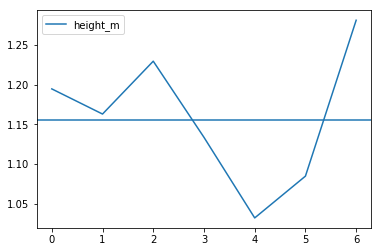

In [487]:
heights.plot(kind='line')
plt.axhline(df.height_m.mean());

In [489]:
weights = pd.DataFrame({'weight_kg': mean_weight})

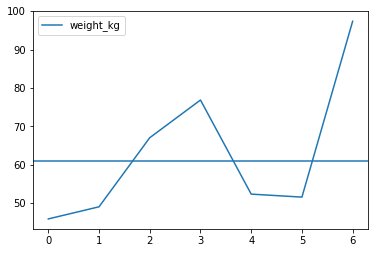

In [490]:
weights.plot(kind='line')
plt.axhline(df.weight_kg.mean());

### 8. 生命值、攻击力、防御力、特殊攻击力和特殊防御力分别最高的Pokemon

In [525]:
df.iloc[df.hp.idxmax()]['name']

'Blissey'

In [526]:
df.iloc[df.attack.idxmax()]['name']

'Heracross'

In [527]:
df.iloc[df.defense.idxmax()]['name']

'Steelix'

In [528]:
df.iloc[df.sp_attack.idxmax()]['name']

'Mewtwo'

In [531]:
df.iloc[df.sp_defense.idxmax()]

pokedex                                             213
name                                            Shuckle
classfication                                      Mold
type1                                               bug
type2                                              rock
abilities            ['Sturdy', 'Gluttony', 'Contrary']
percentage_male                                      50
height_m                                            0.6
weight_kg                                          20.5
base_total                                          505
hp                                                   20
attack                                               10
defense                                             230
sp_attack                                            10
sp_defense                                          230
speed                                                 5
base_happiness                                       70
capture_rate                                    

<a id='conclusions'></a>
## 四. 统计结论